# 1D Classical Allen-Cahn equation

Consider the energy functional
\begin{equation}
    E[u] = \int^L_0 -\dfrac{\epsilon^2}{2} \left\lvert \dfrac{\partial u}{\partial x} \right\rvert^2 + W(u) dx
\end{equation} where $W(u)=\dfrac{(1-u^2)^2}{4}$ is double-well potential

Then the Allen Cahn equation is the $L2$ gradient flow of $E[u]$, that is
\begin{align}
    \dfrac{\partial u}{\partial t} 
    & = -\dfrac{\delta E}{\delta u} \\
    & = -(E[u+h] - E[u]) \\
    & = \int^L_0 \dfrac{\epsilon^2}{2} \lvert \dfrac{\partial}{\partial x}(u+h)\rvert^2 - W(u+h) dx
        - \int^L_0 -\dfrac{\epsilon^2}{2} \lvert \dfrac{\partial u}{\partial x}\rvert^2 + W(u) dx \\
    & = \int^L_0 \dfrac{\epsilon^2}{2} \lvert \dfrac{\partial}{\partial x}(u+h)-\lvert \dfrac{\partial u}{\partial x}) \rvert^2-W(u+h)-W(u) dx
    
\end{align}


[The numerical solutions for the energy-dissipative and mass-conservative Allen–Cahn equation](https://www.sciencedirect.com/science/article/abs/pii/S0898122120301474?casa_token=UegUxB5gMc0AAAAA:xxoVQlcKtcJMDI_g5HZUcBsX9zekD_lpIOpFNEjJqbcH7OUOPNpPt_4GLdaYpxDw4h60-QkjdkE)



In [22]:
import numpy as np
from scipy.optimize import fsolve
from scipy.sparse.linalg import inv, eigs
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def set_Laplacian1D(nx, mesh_size):
    # central differece
    diagonals = [np.ones(nx-1), -2*np.ones(nx-1), np.ones(nx-1)]
    offsets = [-1, 0, 1]
    L = diags(diagonals, offsets, shape=(nx-1, nx-1), format='csr')
    L[0,-1] = L[-1,0] = 1
    return L / mesh_size**2

# 計算Ginzburg-Landau能量的離散形式
def compute_classical_energy(u, eps, dx):
    ux = np.gradient(u)/dx
    term1 = np.sum((eps**2 / 2.0) * (ux**2))
    term2 = np.sum(((1 - u ** 2) ** 2) / 4)
    return dx * (term1 + term2)

def compute_modified_energy():
    return

def solve_nonlinear_function(u_prev, L, epsilon, dt):
    nx = u_prev.size
    I = diags(np.ones(nx), shape=(nx, nx))
    K = -epsilon**2 * dt * L + I
    def nonlinear_function(u):
        u_next = K.dot(u) + dt * u**3 - (1+dt)*u_prev
        return [u_i for u_i in u_next]
    
    root = fsolve(nonlinear_function, np.zeros(nx))
    
    return root

# 定義常數
eps = 0.1

# 定義計算域大小及網格數量
L = 10
Nx = 2**5
x = np.linspace(-L/2, L/2, Nx)
x = x[:-1]
u = np.cos(x)
nonlinear_u = u
linear_u = u
m0 = np.sum(u)

# 計算網格間距
dx = L / (Nx - 1)
dt = 1e-1
iter_max = 5*10**2


Lap = set_Laplacian1D(Nx, dx)
I = diags(np.ones(Nx-1), shape=(Nx-1, Nx-1))
H = (2+1/dt) * I - eps**2 * Lap

energy = compute_classical_energy(u, eps, dx)
nonlinear_energy_list = [energy]
linear_energy_list = [energy]

nonlinear_u_list = [u]
linear_u_list = [u]

# classical allen cahn with convex splitting
for i in range(iter_max):
    nonlinear_u = solve_nonlinear_function(nonlinear_u, Lap, eps, dt)
    nonlinear_energy = compute_classical_energy(nonlinear_u, eps, dx)
    
    b = (3+1/dt)*linear_u - linear_u**3
    linear_u = spsolve(H, b)
    linear_energy = compute_classical_energy(linear_u, eps, dx)
    
    
    nonlinear_energy_list.append(nonlinear_energy)
    nonlinear_u_list.append(nonlinear_u)
    
    linear_energy_list.append(linear_energy)
    linear_u_list.append(linear_u)
    


C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [23]:
linear_mass_list = [np.sum(a) for a in np.diff(linear_u_list, axis=0)]
nonlinear_mass_list = [np.sum(a) for a in np.diff(nonlinear_u_list, axis=0)]

In [40]:
nonlinear_mass_list

[-0.157775906553681,
 -0.15287938323922065,
 -0.147444182917157,
 -0.14153945268438323,
 -0.13523636732950484,
 -0.1286051558451694,
 -0.12171269374343918,
 -0.11462137127938693,
 -0.10738962320452615,
 -0.10007403447752988,
 -0.09273250076279765,
 -0.08542765972483037,
 -0.07822976111872854,
 -0.07121827053418117,
 -0.06448173152418302,
 -0.05811568397776673,
 -0.05221871912234108,
 -0.046887022604638784,
 -0.04220799034472408,
 -0.03825366068444222,
 -0.03507475550135061,
 -0.03269604591688888,
 -0.031113568074474823,
 -0.030293952154542836,
 -0.03017584978730664,
 -0.030673206339130232,
 -0.03167996382296723,
 -0.03307571146589677,
 -0.03473181363748751,
 -0.03651761054328806,
 -0.03830637091063377,
 -0.039980748104903374,
 -0.04143753586814641,
 -0.042591538527493644,
 -0.04337837885459672,
 -0.043756087187355686,
 -0.04370536697282157,
 -0.043228521518554386,
 -0.04234714541282403,
 -0.04109880918134112,
 -0.039533068928098936,
 -0.03770718979025944,
 -0.035681971019047354,
 -0.03

In [24]:
check_list =[dt*np.sum(nonlinear_u_list[i]-nonlinear_u_list[i+1]**3) for i in range(len(nonlinear_mass_list))]

In [32]:
check_list

[-0.15831388028624466,
 -0.15308500274887968,
 -0.14742156952576932,
 -0.1413891444016564,
 -0.13505486692093033,
 -0.12848568479009329,
 -0.1217461448141028,
 -0.11489603808713021,
 -0.10798841292037704,
 -0.10106852192769794,
 -0.09417410789940459,
 -0.0873371071239487,
 -0.08058648104904528,
 -0.07395161056842685,
 -0.06746558441543625,
 -0.061167787002139144,
 -0.05510537849128499,
 -0.04933347553381721,
 -0.04391402184337974,
 -0.038913463865666034,
 -0.03439943345128898,
 -0.0304367116277544,
 -0.027082817247581305,
 -0.024383622709952323,
 -0.022369424414789032,
 -0.021051868252776426,
 -0.020422044175421025,
 -0.020449930051270243,
 -0.021085208032738608,
 -0.02225932571241601,
 -0.02388855513755747,
 -0.025877731921147562,
 -0.028124339507767215,
 -0.0305226344751805,
 -0.032967573494037304,
 -0.03535838250045488,
 -0.03760168474860187,
 -0.03961416149548629,
 -0.04132474871005212,
 -0.04267637506898314,
 -0.043627227807211025,
 -0.04415150624217709,
 -0.04423960241689098,
 -0

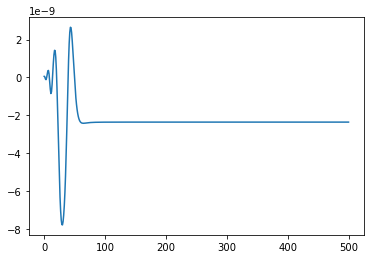

In [25]:
# plt.plot(check_list)
# plt.plot(nonlinear_mass_list)
b = np.array(nonlinear_mass_list)-np.array(check_list)
plt.plot(b)
# plt.ylim(-0.01,0.01)
# plt.plot(a)

In [26]:
a = np.array(nonlinear_mass_list)-np.array(linear_mass_list)

In [27]:
print(f"{a[4]}, {b[2]}")

-0.006205050868132056, -7.190442685711673e-11


(-0.1, 0.1)

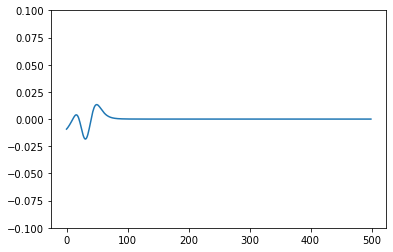

In [29]:
# plt.plot(linear_mass_list)
# plt.plot(nonlinear_mass_list)
plt.plot(a)
plt.ylim(-0.1, 0.1)

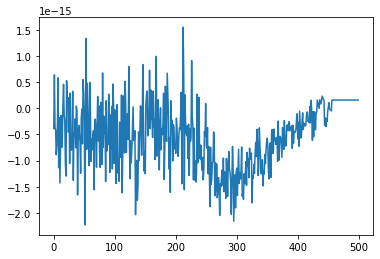

In [30]:
# plt.plot(linear_mass_list)
plt.plot(linear_mass_list-np.array([(dt/(2*dt+1))*np.sum(linear_u_list[i]-linear_u_list[i]**3) for i in range(len(nonlinear_mass_list))]))

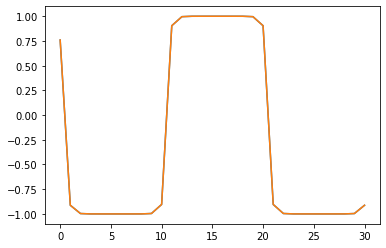

In [4]:
plt.plot(nonlinear_u_list[-1])
plt.plot(linear_u_list[-1])

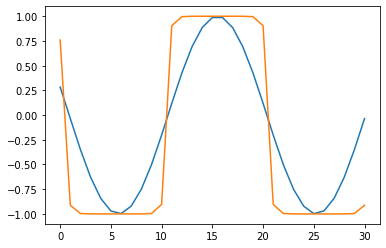

In [5]:
plt.plot(nonlinear_u_list[0])
plt.plot(nonlinear_u_list[-1])

In [10]:
def solve_nonlinear_function(u_prev, L, eps, dt):
    nx = u_prev.size
    I = diags(np.ones(nx), shape=(nx, nx))
    K = (1-dt)*I - dt*eps**2 * L
#     K = I - (dt*eps**2) * L
    def nonlinear_function(u):
        u_next = K.dot(u) - 2*dt*u**3 + 3*dt*u_prev**2 -u_prev
#         u_next = K.dot(u) - (1+dt)*u_prev - 2*dt*u_prev**3 + 3*dt*u**2
        return [u_i for u_i in u_next]
    
    root = fsolve(nonlinear_function, np.zeros(nx))
    
    return root

eps = 0.1

# 定義計算域大小及網格數量
L = 10
Nx = 2**6
x = np.linspace(-L/2, L/2, Nx)
x = x[:-1]
u = np.cos(x)
m0 = np.sum(u)

# 計算網格間距
dx = L / (Nx - 1)
dt = 1e-1
iter_max = 5*10**2


Lap = set_Laplacian1D(Nx, dx)

energy = compute_classical_energy(u, eps, dx)
energy_list = [energy]

u_list = [u]
mass_list = []

I = diags(np.ones(Nx-1), shape=(Nx-1, Nx-1))
H = (2+1/dt) * I - eps**2 * Lap

# classical allen cahn with convex splitting
for i in range(iter_max):
    b = (3+1/dt)*u - u**3
    u = spsolve(H, b)
    energy = compute_classical_energy(u, eps, dx)

    
    energy_list.append(energy)
    u_list.append(u)
    mass_list.append(m)
    

C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


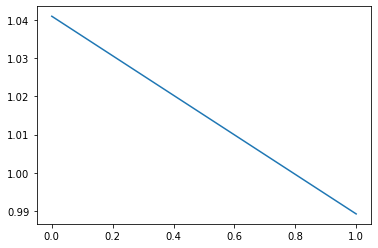

In [2]:
plt.plot(energy_list)

IndexError: list index out of range

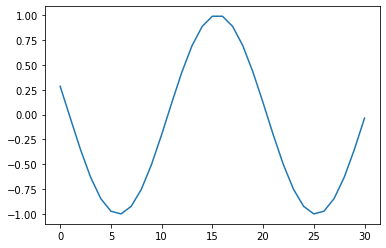

In [3]:
plt.plot(u_list[0])
plt.plot(u_list[1])
plt.plot(u_list[-1])
# plt.plot(u_list[3])

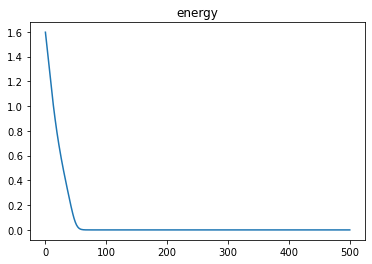

In [12]:
plt.title("energy")
plt.plot(energy_list)
plt.show()

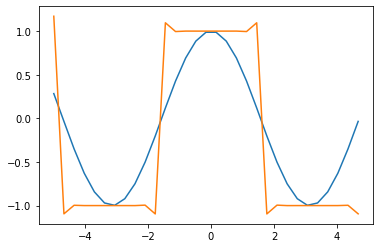

In [2]:
plt.plot(x,u_list[0])
# plt.plot(u_list[49])
plt.plot(x,u_list[-1])
plt.show()

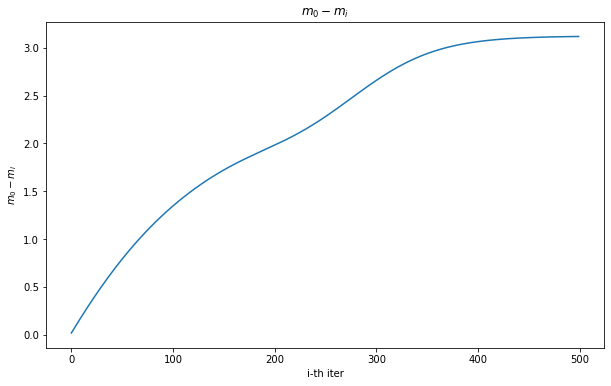

In [16]:
plt.figure(figsize=(10,6))
plt.title("$m_0-m_i$")
plt.plot(mass_list)
plt.ylabel("$m_0-m_i$")
plt.xlabel("i-th iter")
# plt.ylim(1e-14,-1e-14)
plt.show()

# modified energy

In [3]:
# 定義常數
eps = 0.1

# 定義計算域大小及網格數量
L = 1
Nx = 2**5
x = np.linspace(-L/2, L/2, Nx)
x = x[:-1]
u = np.cos(x)
m0 = np.sum(u)

# 計算網格間距
dx = L / (Nx - 1)
dt = 1e-2
iter_max = 10**3

tol = 1e-3

Lap = set_Laplacian1D(Nx, dx)

energy = compute_classical_energy(u, eps, dx)
energy_list = [energy]

u_list = [u]
mass_list = []

energy_diff = 1e10

count_converge = 0

# classical allen cahn with convex splitting
for i in range(iter_max):
    if energy_diff < tol:
        break
    else:
        # set the initial iteration step
#         lr = 2 / (dt * epsilon * (8/dx**2) + 1 + 2*dt)
    
        # compute the possible direction
        u_next = solve_nonlinear_function(u, Lap, eps, dt)
        m_next = np.sum(u_next)
    
        # project
#         u = u_next + ((m0-m_next)/(Nx-1)) * np.ones(Nx-1)
#         print((u-u_next)/dt )
        
        
        energy = compute_classical_energy(u, eps, dx)
        m = m0 - np.sum(u)
        
        energy_diff = abs(energy_list[-1] - energy)
    
        energy_list.append(energy)
        u_list.append(u)
        mass_list.append(m)
        
        count_converge +=1
        
print(f'Total iteration for the difference previous and current energy tolerance {tol}: ', count_converge)

Total iteration for the difference previous and current energy tolerance 0.001:  197


C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


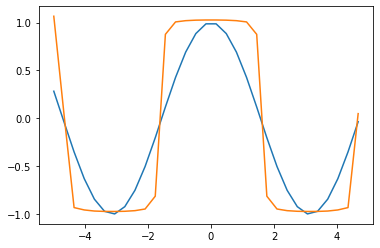

In [4]:
plt.plot(x,u_list[0])
# plt.plot(u_list[49])
plt.plot(x,u_list[-1])
plt.show()

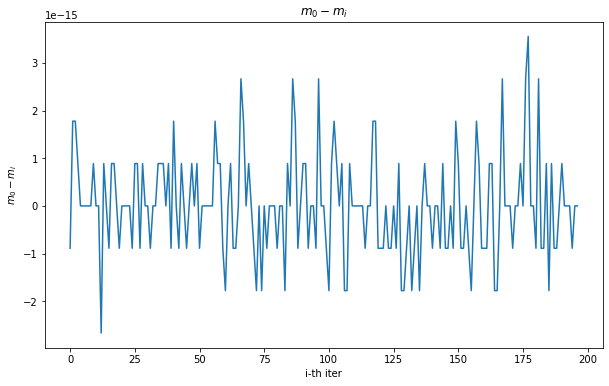

In [5]:
plt.figure(figsize=(10,6))
plt.title("$m_0-m_i$")
plt.plot(mass_list)
plt.ylabel("$m_0-m_i$")
plt.xlabel("i-th iter")
# plt.ylim(1e-14,-1e-14)
plt.show()

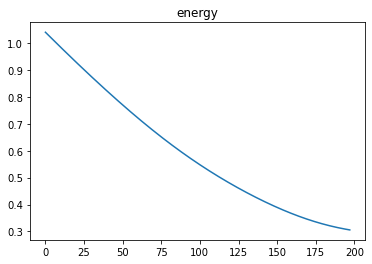

In [90]:
plt.title("energy")
plt.plot(energy_list)
plt.show()

In [78]:
# linear splitting

# 定義常數
eps = 0.1

# 定義計算域大小及網格數量
L = 1
Nx = 2**5
x = np.linspace(-L, L, Nx)
x = x[:-1]
u = -(np.cos(2*np.pi*x)/4 +0.2)
m0 = np.sum(u)
u0 = u
# 計算網格間距
dx = (L-(-L)) / (Nx - 1)
dt = 1e-2
iter_max = 500

tol = 1e-5

Lap = set_Laplacian1D(Nx, dx)
I = diags(np.ones(Nx-1), shape=(Nx-1, Nx-1))
H = (2*dt+1) * I - dt*eps**2 * Lap

energy = compute_classical_energy(u, eps, dx)
energy_list = [energy]

u_list = [u]
mass_list = [np.sum(u)]

energy_diff = 1e10

count_converge = 0

# classical allen cahn with convex splitting
for i in range(iter_max):
    # compute the possible direction
    b = (3*dt+1) * u - dt*u**3
    u = spsolve(H, b)
    
    energy = compute_classical_energy(u, eps, dx)
    
    energy_list.append(energy)
    u_list.append(u)
    mass_list.append(np.sum(u))
        
    count_converge +=1
#     print(f"count: {count_converge}, energy: {energy}")
    
    
# print(f'Total iteration for the difference previous and current energy tolerance {tol}: ', count_converge)
    print(f"infinity norm {i+1}: ", np.linalg.norm(u_list[-1]-u_list[-2] , np.inf))

C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


infinity norm 1:  0.0025636124215555056
infinity norm 2:  0.00257305526779833
infinity norm 3:  0.002582363780993857
infinity norm 4:  0.0025915357127735406
infinity norm 5:  0.0026005687962497026
infinity norm 6:  0.0026094607478710508
infinity norm 7:  0.0026182092692824677
infinity norm 8:  0.002626812049191518
infinity norm 9:  0.0026352667652400075
infinity norm 10:  0.0026435710858853656
infinity norm 11:  0.0026517226722873044
infinity norm 12:  0.0026597191802044673
infinity norm 13:  0.0026675582618989613
infinity norm 14:  0.002675237568048938
infinity norm 15:  0.0026827547496708903
infinity norm 16:  0.0026901171817508285
infinity norm 17:  0.002697406479653608
infinity norm 18:  0.0027045319458579575
infinity norm 19:  0.002711491159102297
infinity norm 20:  0.002718281709011283
infinity norm 21:  0.00272490119794494
infinity norm 22:  0.002731347242858728
infinity norm 23:  0.0027376174771757134
infinity norm 24:  0.0027437095526678945
infinity norm 25:  0.002749855012080

infinity norm 459:  0.00010324515054316308
infinity norm 460:  0.00010109246349676582
infinity norm 461:  9.898466603430744e-05
infinity norm 462:  9.692083071377589e-05
infinity norm 463:  9.490004867052093e-05
infinity norm 464:  9.292142927608271e-05
infinity norm 465:  9.098409980012878e-05
infinity norm 466:  8.908720507938561e-05
infinity norm 467:  8.722990719089996e-05
infinity norm 468:  8.541138512840885e-05
infinity norm 469:  8.363083448614805e-05
infinity norm 470:  8.188746714399286e-05
infinity norm 471:  8.018051096292389e-05
infinity norm 472:  7.850920947827245e-05
infinity norm 473:  7.687282160229181e-05
infinity norm 474:  7.527062133150242e-05
infinity norm 475:  7.370189745625755e-05
infinity norm 476:  7.216595327597108e-05
infinity norm 477:  7.066210632089565e-05
infinity norm 478:  6.918968807501091e-05
infinity norm 479:  6.774804370623944e-05
infinity norm 480:  6.633653180088128e-05
infinity norm 481:  6.495452410015812e-05
infinity norm 482:  6.3601405243

In [7]:
invH = (3+1/dt)*inv(H) - I
invH = inv(H)

In [8]:
np.linalg.norm(invH.toarray(), np.inf)

0.9803921568627456

In [55]:
1/eigs(H.toarray())[0]

array([0.00238305+0.j, 0.00238309+0.j, 0.00238305+0.j, 0.00238318+0.j,
       0.00238309+0.j, 0.00238318+0.j])

In [27]:
eigs(invH)[0]

array([0.98039216+0.j, 0.96549413+0.j, 0.9476281 +0.j, 0.97661536+0.j,
       0.97661536+0.j, 0.96549413+0.j])

In [19]:
np.linalg.norm(inv(H).toarray(), np.inf)

0.9803921568627452

In [142]:
np.diff(mass_list)

array([-0.0361188 , -0.03601505, -0.03590954, -0.03580226, -0.03569325,
       -0.03558252, -0.03547008, -0.03535596, -0.03524017, -0.03512272,
       -0.03500364, -0.03488294, -0.03476065, -0.03463677, -0.03451133,
       -0.03438435, -0.03425585, -0.03412583, -0.03399433, -0.03386137,
       -0.03372695, -0.03359111, -0.03345386, -0.03331521, -0.0331752 ,
       -0.03303384, -0.03289115, -0.03274716, -0.03260187, -0.03245532,
       -0.03230752, -0.0321585 , -0.03200827, -0.03185685, -0.03170428,
       -0.03155056, -0.03139572, -0.03123979, -0.03108278, -0.03092471,
       -0.03076562, -0.03060551, -0.03044441, -0.03028234, -0.03011933,
       -0.0299554 , -0.02979057, -0.02962486, -0.02945829, -0.02929089,
       -0.02912268, -0.02895368, -0.02878392, -0.02861341, -0.02844218,
       -0.02827026, -0.02809766, -0.0279244 , -0.02775052, -0.02757603,
       -0.02740096, -0.02722532, -0.02704915, -0.02687246, -0.02669528,
       -0.02651762, -0.02633952, -0.026161  , -0.02598207, -0.02

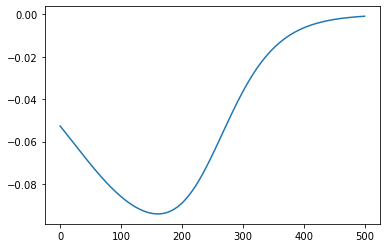

In [79]:
plt.plot(np.diff(mass_list))

In [92]:
difference_list = []
for i in range(len(u_list)-1):
    v = ((3*dt+1)/dt) * u_list[i] - u_list[i]**3
    difference_list.append(np.sum(u_list[i+1]) - (dt/(2*dt+1)) * np.sum(v))

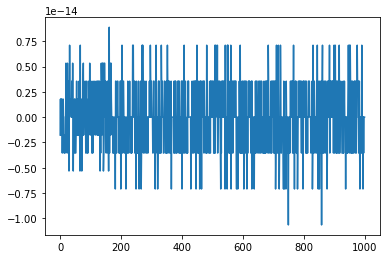

In [93]:
plt.plot(difference_list)

In [5]:
difference_list = []
for i in range(len(u_list)-1):
    v = ((3*dt+1)/dt) * u_list[i] - u_list[i]**3
    difference_list.append((dt/(2*dt+1)) *np.sum(v)-np.sum(u_list[i]))

NameError: name 'difference_list' is not defined

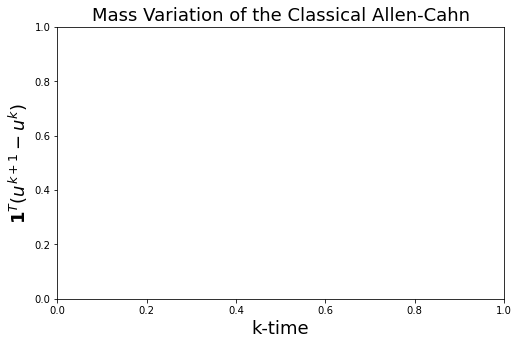

In [80]:
plt.figure(figsize=(8,5))
plt.title("Mass Variation of the Classical Allen-Cahn", fontsize=18)
plt.xlabel("k-time", fontsize=18)
plt.ylabel(r"$\mathbf{1}^T(u^{k+1}-u^{k})$", fontsize=18)
plt.plot(difference_list[:100], '-')
plt.show()


In [100]:
np.sum(u_list[1]-u_list[0])

-0.03611879781483677

In [103]:
(dt/(2*dt+1))*np.sum(u_list[0]-u_list[0]**3)

-0.036118797814837164

In [56]:
np.sum(u_list[2])-(dt/(1+2*dt)*(np.sum(3*u_list[1])-np.sum(u_list[1]**3)) + np.sum(u_list[1]))

0.2371212869099999

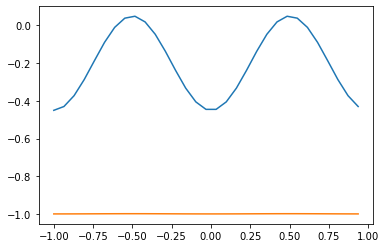

In [81]:
plt.plot(x,u_list[0])
# plt.plot(u_list[49])
plt.plot(x,u_list[-1])
plt.show()

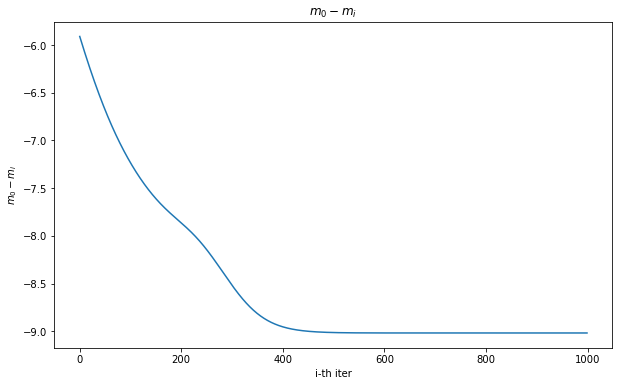

In [8]:
plt.figure(figsize=(10,6))
plt.title("$m_0-m_i$")
plt.plot(mass_list)
plt.ylabel("$m_0-m_i$")
plt.xlabel("i-th iter")
# plt.ylim(1e-14,-1e-14)
plt.show()

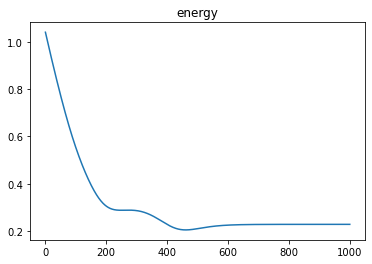

In [25]:
plt.title("energy")
plt.plot(energy_list)
plt.show()